 Bibliotheken & Daten einlesen

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# URLs
base = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/"
df_umsatz = pd.read_csv(base + "umsatzdaten_gekuerzt.csv")
df_wetter = pd.read_csv(base + "wetter.csv")
df_kiwo = pd.read_csv(base + "kiwo.csv")


Datenvorbereitung & Merging

In [26]:
# Datum in datetime umwandeln
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])
df_wetter['Datum'] = pd.to_datetime(df_wetter['Datum'])
df_kiwo['Datum'] = pd.to_datetime(df_kiwo['Datum'])

# Mergen
merged = df_umsatz.merge(df_wetter, on='Datum', how='left')
merged = merged.merge(df_kiwo, on='Datum', how='left')


Fehlende Werte pro Spalte

In [27]:
# Anzahl fehlender Werte je Spalte
missing_per_column = merged.isnull().sum()
print("Fehlende Werte je Spalte:")
print(missing_per_column)

# Prozentualer Anteil
print("\nProzentualer Anteil fehlender Werte je Spalte:")
print((missing_per_column / len(merged) * 100).round(2))
print(f"Anzahl der Zeilen im DataFrame: {len(merged)}")

Fehlende Werte je Spalte:
id                        0
Datum                     0
Warengruppe               0
Umsatz                    0
Bewoelkung               70
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2325
KielerWoche            9111
dtype: int64

Prozentualer Anteil fehlender Werte je Spalte:
id                      0.00
Datum                   0.00
Warengruppe             0.00
Umsatz                  0.00
Bewoelkung              0.75
Temperatur              0.17
Windgeschwindigkeit     0.17
Wettercode             24.91
KielerWoche            97.61
dtype: float64
Anzahl der Zeilen im DataFrame: 9334


Zeilen mit fehlenden Werten anzeigen

In [28]:
# Zeilen, in denen mindestens ein Wert fehlt
rows_with_na = merged[merged.isnull().any(axis=1)]
print(f"Anzahl Zeilen mit fehlenden Werten: {len(rows_with_na)}")

# Optional: Die ersten paar betroffenen Zeilen anzeigen
rows_with_na.head()


Anzahl Zeilen mit fehlenden Werten: 9169


,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN


Deskriptive Statistiken

In [29]:
print("Allgemeine Statistiken:")
print(merged.describe(include='all'))


Allgemeine Statistiken:
                 id                          Datum  Warengruppe       Umsatz  \
count  9.334000e+03                           9334  9334.000000  9334.000000   
mean   1.559311e+06  2016-01-13 23:56:27.100921344     3.088172   206.749044   
min    1.307011e+06            2013-07-01 00:00:00     1.000000     7.051201   
25%    1.410123e+06            2014-10-12 00:00:00     2.000000    96.897441   
50%    1.601102e+06            2016-01-10 00:00:00     3.000000   161.900831   
75%    1.704223e+06            2017-04-22 00:00:00     4.000000   280.644663   
max    1.807315e+06            2018-07-31 00:00:00     6.000000  1879.461831   
std    1.512503e+05                            NaN     1.489002   144.545189   

        Bewoelkung   Temperatur  Windgeschwindigkeit   Wettercode  KielerWoche  
count  9264.000000  9318.000000          9318.000000  7009.000000        223.0  
mean      4.720747    12.028483            10.974780    36.900128          1.0  
min       0.

Umsatz über Zeit

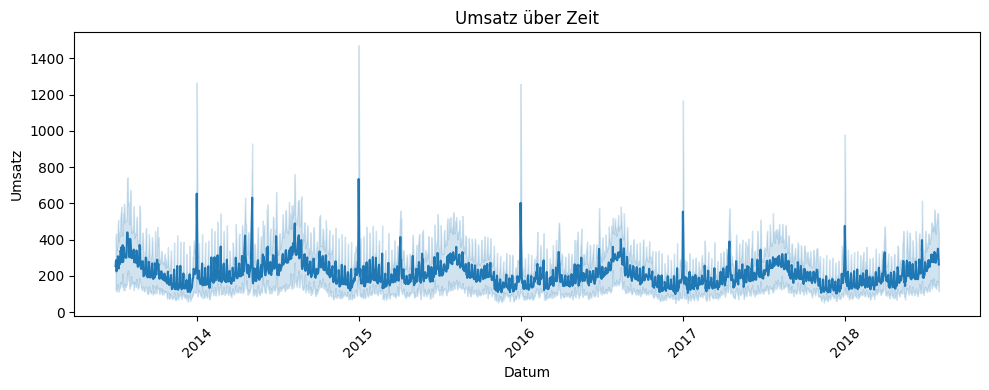

In [30]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Datum', y='Umsatz', data=merged)
plt.title('Umsatz über Zeit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mittleren Umsatz pro Kalendertag berechnen und Jahresdurchschnittlicher Umsatz pro Kalendertag plotten

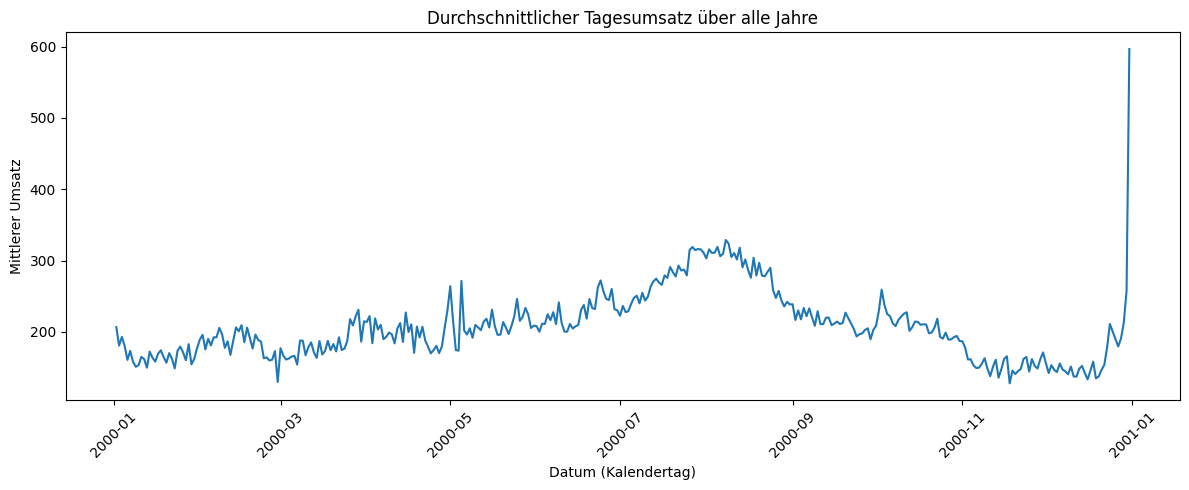

In [31]:
# Neue Spalte für Kalendertag im Format MM-TT (z. B. '07-01' für 1. Juli)
merged['TagMonat'] = merged['Datum'].dt.strftime('%m-%d')

# Durchschnittlicher Umsatz pro Kalendertag über alle Jahre
umsatz_pro_tag = merged.groupby('TagMonat')['Umsatz'].mean().reset_index()

# Damit wir die Daten als Datum plotten können, fügen wir ein Dummy-Jahr (2000) hinzu.
# Das hilft nur für die Sortierung und Achsenbeschriftung – das Jahr selbst ist bedeutungslos.
umsatz_pro_tag['DatumDummy'] = pd.to_datetime('2000-' + umsatz_pro_tag['TagMonat'], format='%Y-%m-%d')


plt.figure(figsize=(12, 5))
sns.lineplot(x='DatumDummy', y='Umsatz', data=umsatz_pro_tag)
plt.title('Durchschnittlicher Tagesumsatz über alle Jahre')
plt.xlabel('Datum (Kalendertag)')
plt.ylabel('Mittlerer Umsatz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Temperatur über Zeit

Erklärung zum Pearson-Korrelationskoeffizienten
Wir verwenden hier den Pearson-Korrelationskoeffizienten,
weil er am häufigsten genutzt wird, um lineare Zusammenhänge
zwischen zwei kontinuierlichen numerischen Variablen zu messen.

Was misst er?
Der Pearson-Koeffizient misst, wie gut die Beziehung
zwischen zwei Variablen durch eine Gerade beschrieben werden kann.

Wertebereich:
Werte liegen zwischen -1 (perfekte negative Korrelation)
und +1 (perfekte positive Korrelation), 0 bedeutet keinen linearen Zusammenhang.

 Beispiel:
 - Ein Wert nahe +1 bedeutet, dass beide Variablen tendenziell gleichzeitig steigen.
 - Ein Wert nahe -1 bedeutet, dass eine Variable steigt, wenn die andere fällt.
- Ein Wert nahe 0 deutet darauf hin, dass kein linearer Zusammenhang besteht.

-1 bedeutet perfekte negative lineare Korrelation

0 bedeutet keine lineare Korrelation

+1 bedeutet perfekte positive lineare Korrelation

Wie wird er berechnet?
Er basiert auf der Kovarianz der beiden Variablen, normalisiert durch
das Produkt ihrer Standardabweichungen:

r = cov(X, Y) / (std(X) * std(Y))

Dabei ist:

cov(X, Y) die Kovarianz zwischen X und Y,

std(X) und std(Y) die Standardabweichungen von X und Y.

Intuitiv:

Kovarianz misst, wie zwei Variablen gemeinsam variieren,

Die Normierung sorgt dafür, dass r immer zwischen -1 und 1 liegt,
sodass man leicht die Stärke und Richtung des Zusammenhangs erkennt.

Warum Pearson?

Er ist einfach zu berechnen und interpretieren,

Er ist sensitiv für lineare Zusammenhänge,

Er setzt voraus, dass die Variablen annähernd normalverteilt sind.

Achtung:

Nicht-lineare Zusammenhänge werden von Pearson oft nicht erkannt,

Ausreißer können den Koeffizienten stark beeinflussen,

Korrelation bedeutet nicht Kausalität.



Korrelationsmatrix:
                           id  Warengruppe    Umsatz  Bewoelkung  Temperatur  \
id                   1.000000    -0.019982 -0.086929   -0.010526   -0.069656   
Warengruppe         -0.019982     1.000000 -0.062589    0.023795   -0.047015   
Umsatz              -0.086929    -0.062589  1.000000   -0.089916    0.222935   
Bewoelkung          -0.010526     0.023795 -0.089916    1.000000   -0.391635   
Temperatur          -0.069656    -0.047015  0.222935   -0.391635    1.000000   
Windgeschwindigkeit  0.007566    -0.009078  0.014705    0.041809    0.003734   
Wettercode          -0.095554     0.009547 -0.010091    0.525547   -0.086582   
KielerWoche               NaN          NaN       NaN         NaN         NaN   

                     Windgeschwindigkeit  Wettercode  KielerWoche  
id                              0.007566   -0.095554          NaN  
Warengruppe                    -0.009078    0.009547          NaN  
Umsatz                          0.014705   -0.010091   

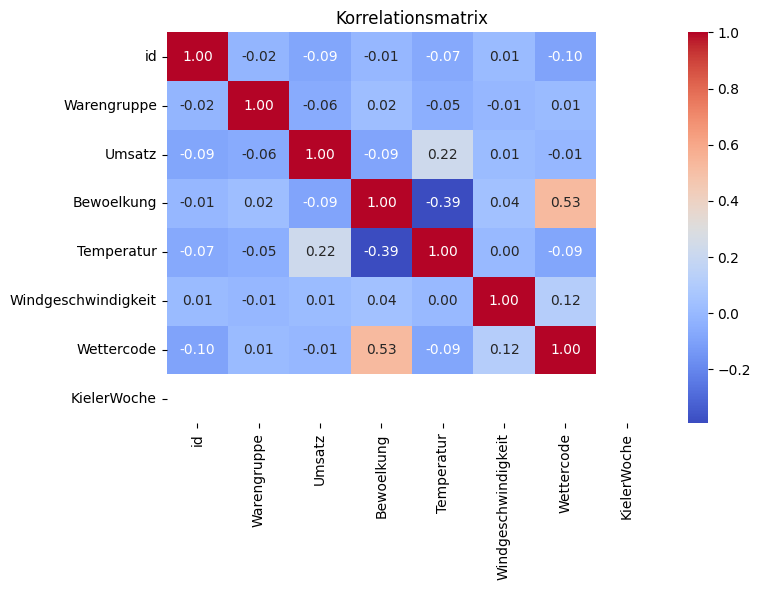

In [32]:

corr = merged.corr(numeric_only=True)
print("Korrelationsmatrix:")
print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix')
plt.tight_layout()
plt.show()

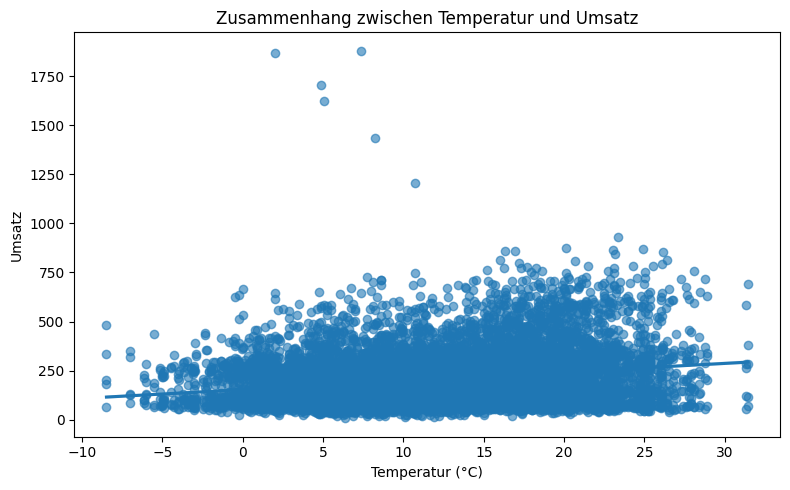

In [34]:
# Scatterplot mit Regressionslinie:
# Visualisiert den Zusammenhang zwischen Temperatur (x) und Umsatz (y).
# Jeder Punkt ist ein Tag. Die blaue Linie zeigt den Trend (lineare Regression).
# Bei einem Korrelationswert von 0.22 ist der Zusammenhang eher schwach,
# aber die Visualisierung kann trotzdem Muster oder Ausreißer zeigen.

plt.figure(figsize=(8, 5))
sns.regplot(x='Temperatur', y='Umsatz', data=merged, scatter_kws={'alpha':0.6})
plt.title('Zusammenhang zwischen Temperatur und Umsatz')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Umsatz')
plt.tight_layout()
plt.show()



Durchschnittlicher Umsatz pro Temperaturbereich 

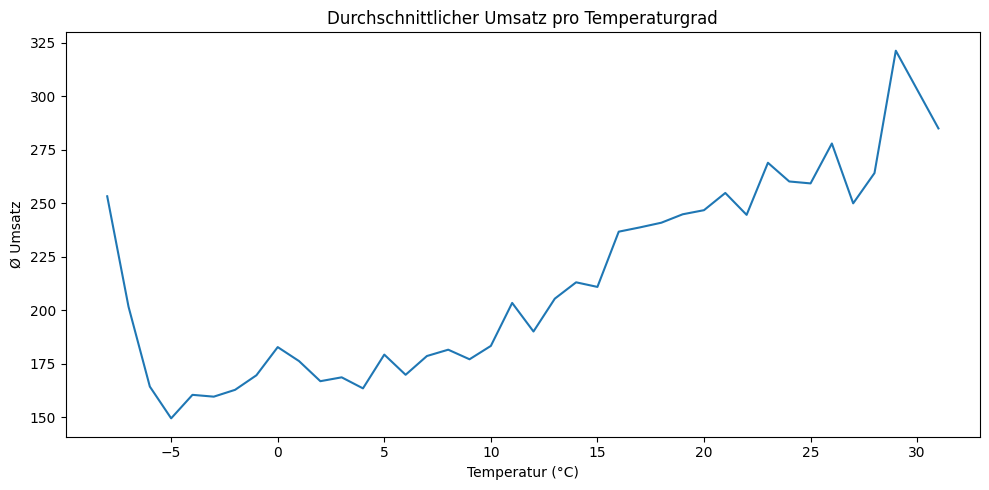

In [37]:
# Temperatur runden auf ganze Grade
merged['Temp_rund'] = merged['Temperatur'].round()

# Durchschnittlicher Umsatz je Temperaturgrad
temp_umsatz = merged.groupby('Temp_rund')['Umsatz'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Temp_rund', y='Umsatz', data=temp_umsatz)
plt.title('Durchschnittlicher Umsatz pro Temperaturgrad')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Ø Umsatz')
plt.tight_layout()
plt.show()


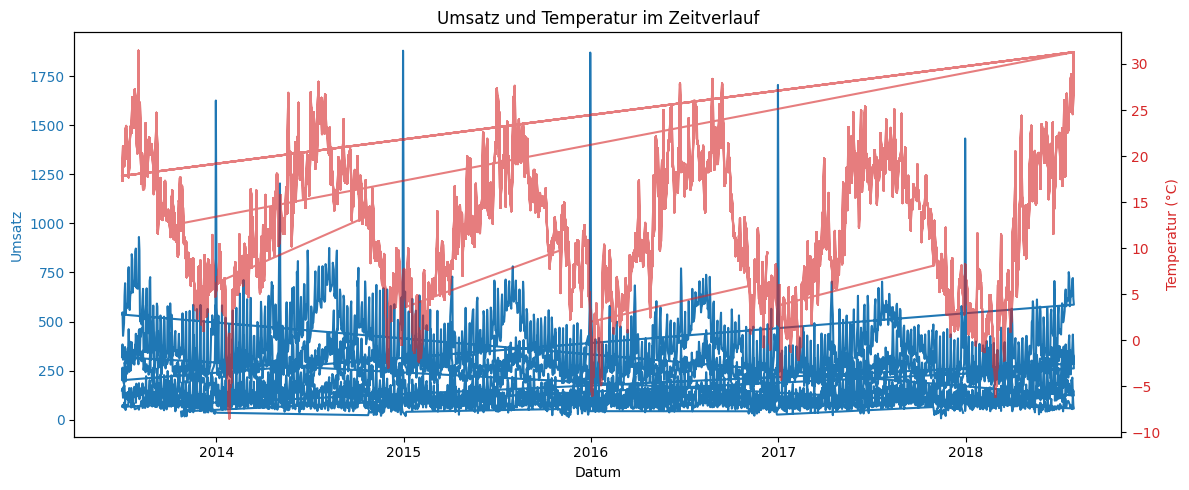

In [38]:
# Plot mit zwei Y-Achsen:
# Umsatz und Temperatur werden gemeinsam über der Zeit dargestellt.
# Damit lassen sich saisonale Muster erkennen, z. B. ob Umsätze an warmen Tagen steigen.
# Achtung: Die beiden Skalen sind unterschiedlich, aber helfen beim optischen Vergleich.

fig, ax1 = plt.subplots(figsize=(12, 5))

# Umsatz (linke Y-Achse)
ax1.set_xlabel('Datum')
ax1.set_ylabel('Umsatz', color='tab:blue')
ax1.plot(merged['Datum'], merged['Umsatz'], color='tab:blue', label='Umsatz')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Temperatur (rechte Y-Achse)
ax2 = ax1.twinx()
ax2.set_ylabel('Temperatur (°C)', color='tab:red')
ax2.plot(merged['Datum'], merged['Temperatur'], color='tab:red', alpha=0.6, label='Temperatur')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Umsatz und Temperatur im Zeitverlauf')
fig.tight_layout()
plt.show()


# Durchschnittlicher Umsatz und Temperatur pro Kalendertag
Da der ursprüngliche Plot mit täglichen Werten über mehrere Jahre zu unübersichtlich war, haben wir für jeden Kalendertag den durchschnittlichen Umsatz und die Temperatur berechnet. So lassen sich saisonale Muster deutlich besser erkennen.


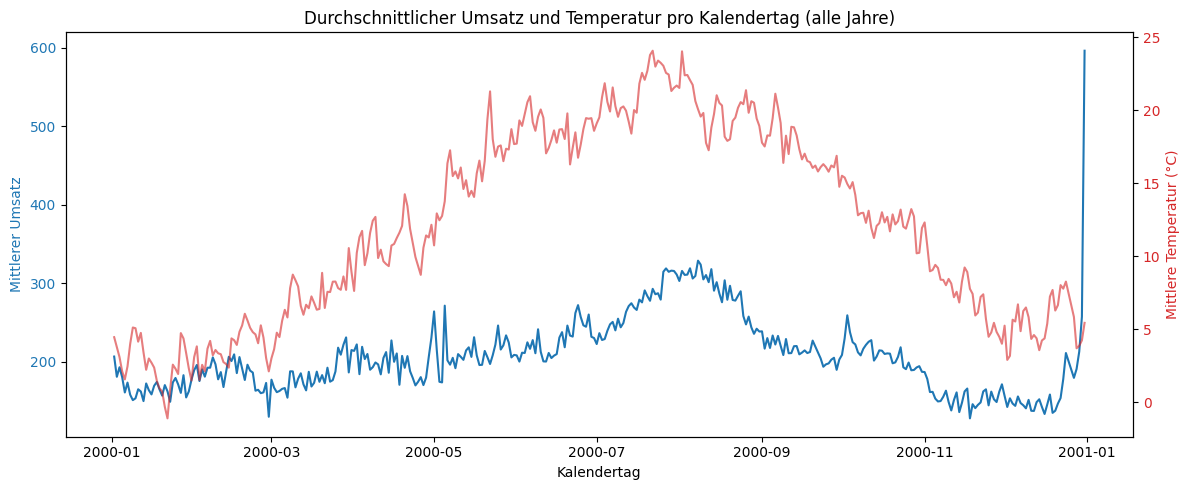

In [39]:
# Neue Spalte für Kalendertag im Format MM-TT (z. B. '07-01' für 1. Juli)
merged['TagMonat'] = merged['Datum'].dt.strftime('%m-%d')

# Durchschnittlicher Umsatz und Temperatur pro Kalendertag über alle Jahre
mittelwerte_pro_tag = merged.groupby('TagMonat')[['Umsatz', 'Temperatur']].mean().reset_index()

# Dummy-Jahr 2000 hinzufügen für saubere Sortierung im Plot (Tippfehler hier korrigiert!)
mittelwerte_pro_tag['DatumDummy'] = pd.to_datetime('2000-' + mittelwerte_pro_tag['TagMonat'], format='%Y-%m-%d')

# Plot: Umsatz und Temperatur im Jahresverlauf (durchschnittlich über alle Jahre)
fig, ax1 = plt.subplots(figsize=(12, 5))

# Umsatz (linke Y-Achse)
ax1.set_xlabel('Kalendertag')
ax1.set_ylabel('Mittlerer Umsatz', color='tab:blue')
ax1.plot(mittelwerte_pro_tag['DatumDummy'], mittelwerte_pro_tag['Umsatz'], color='tab:blue', label='Umsatz')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Temperatur (rechte Y-Achse)
ax2 = ax1.twinx()
ax2.set_ylabel('Mittlere Temperatur (°C)', color='tab:red')
ax2.plot(mittelwerte_pro_tag['DatumDummy'], mittelwerte_pro_tag['Temperatur'], color='tab:red', label='Temperatur', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Durchschnittlicher Umsatz und Temperatur pro Kalendertag (alle Jahre)')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()



/tmp/ipykernel_17442/4220919342.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  umsatz_temp_bins = merged.groupby('Temp_Klasse')['Umsatz'].mean().reset_index()


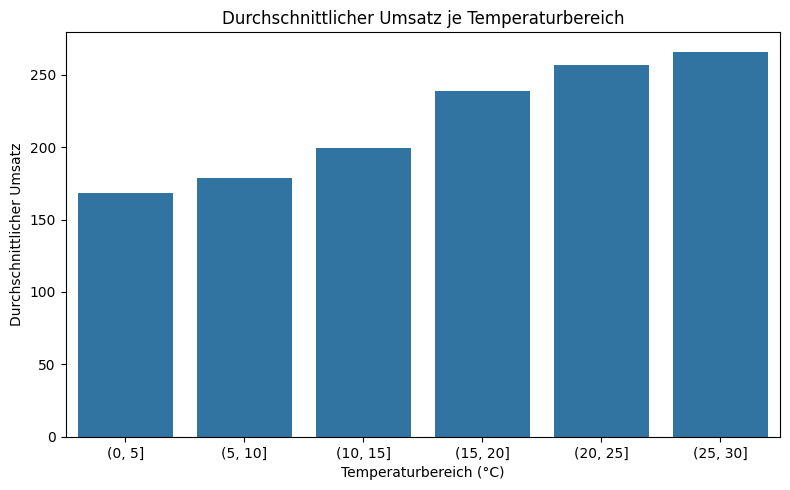

In [40]:
# Temperatur in Gruppen einteilen (z. B. 0–5 °C, 5–10 °C, ...):
# So kann man sehen, ob bestimmte Temperaturbereiche typischerweise mit höherem Umsatz verbunden sind.
# Das ist hilfreich, wenn die Beziehung nicht-linear ist.

merged['Temp_Klasse'] = pd.cut(merged['Temperatur'], bins=range(0, 35, 5))

# Durchschnittlicher Umsatz pro Temperaturklasse
umsatz_temp_bins = merged.groupby('Temp_Klasse')['Umsatz'].mean().reset_index()

# Balkendiagramm zeigt: wie variiert der mittlere Umsatz mit der Temperatur?
plt.figure(figsize=(8, 5))
sns.barplot(x='Temp_Klasse', y='Umsatz', data=umsatz_temp_bins)
plt.title('Durchschnittlicher Umsatz je Temperaturbereich')
plt.xlabel('Temperaturbereich (°C)')
plt.ylabel('Durchschnittlicher Umsatz')
plt.tight_layout()
plt.show()
